## Exploring Ireland's milk imports and exports

by YAP S S, 15 November 2017


A country's economy depends, sometimes heavily, on its exports and imports. 

The United Nations Comtrade database provides data on global trade. 

It will be used to analyse Ireland's imports and exports of milk and cream in 2015:

- How much does Ireland export and import and is the balance positive (more exports than imports)? 
- Which are the main trading partners, i.e. from/to which countries does Ireland import/export the most?
- Which are the regular customers, i.e. which countries buy milk from Ireland every month?
- Which countries does Ireland both import from and export to?

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

## Getting and preparing the data

The data is obtained from the [United Nations Comtrade](http://comtrade.un.org/data/) website, by selecting the following :

- Type of Product: goods
- Frequency: monthly 
- Periods: 2015
- Reporter: Ireland
- Partners: all
- Flows: imports and exports
- HS (as reported) commodity codes: 0401 (Milk and cream, neither concentrated nor sweetened) and 0402 (Milk and cream, concentrated or sweetened)

Clicking on 'Preview' results in a message that the data exceeds 500 rows. 

 Data was downloaded using the Download CSV button and the download file renamed appropriately.



In [2]:
LOCATION = 'comtrade_milk_irl_2015.csv'

## Accessing data through APIs

The data can also be downloaded directly from Comtrade using the "View API Call" URL, modified in two ways:

- `max=500` is increased to `max=5000` to make sure all data is loaded,
- `&fmt=csv` is added at the end to obtain the data in CSV format.

In [3]:
 LOCATION = 'http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2015&r=372&p=all&rg=1%2C2&cc=0401%2C0402&fmt=csv'

On reading in the data, the commodity code has to be read as a string, to not lose the leading zero.

In [4]:
milk = read_csv(LOCATION, dtype={'Commodity Code':str})
milk
milk.tail()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
826,HS,2015,201512,December 2015,4,0,2,Exports,372,Ireland,...,NaN,NaN,NaN,NaN,114000,NaN,269075,NaN,NaN,0
827,HS,2015,201512,December 2015,4,0,1,Imports,372,Ireland,...,NaN,NaN,NaN,NaN,70,NaN,573,NaN,NaN,0
828,HS,2015,201512,December 2015,4,0,2,Exports,372,Ireland,...,NaN,NaN,NaN,NaN,24,NaN,54,NaN,NaN,0
829,HS,2015,201512,December 2015,4,0,2,Exports,372,Ireland,...,NaN,NaN,NaN,NaN,50000,NaN,125085,NaN,NaN,0
830,HS,2015,201512,December 2015,4,0,1,Imports,372,Ireland,...,NaN,NaN,NaN,NaN,21013,NaN,38192,NaN,NaN,0


In [5]:
milk.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2015,201501,January 2015,4,0,2,Exports,372,Ireland,...,NaN,NaN,NaN,NaN,8763469,NaN,3712609,NaN,NaN,0
1,HS,2015,201512,December 2015,4,0,1,Imports,372,Ireland,...,NaN,NaN,NaN,NaN,3918,NaN,5160,NaN,NaN,0
2,HS,2015,201512,December 2015,4,0,2,Exports,372,Ireland,...,NaN,NaN,NaN,NaN,22248,NaN,21928,NaN,NaN,0
3,HS,2015,201512,December 2015,4,0,1,Imports,372,Ireland,...,NaN,NaN,NaN,NaN,3439,NaN,33668,NaN,NaN,0
4,HS,2015,201512,December 2015,4,0,1,Imports,372,Ireland,...,NaN,NaN,NaN,NaN,1188,NaN,5505,NaN,NaN,0


The data only covers the 12 months of 2015. 

Most columns are irrelevant for this analysis, or contain always the same value, like the year and reporter columns. 

The commodity code is transformed into a short but descriptive text and only the relevant columns are selected.

In [6]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
milk[COMMODITY] = milk['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
milk = milk[headings]
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,201501,World,Exports,unprocessed,3712609
1,201512,Lithuania,Imports,unprocessed,5160
2,201512,Mauritius,Exports,unprocessed,21928
3,201512,"Other Asia, nes",Imports,unprocessed,33668
4,201512,Netherlands,Imports,unprocessed,5505


The data contains the total imports and exports per month, under the 'World' partner. Those rows are removed to keep only the per-country data.

In [7]:
milk = milk[milk[PARTNER] != 'World']
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
1,201512,Lithuania,Imports,unprocessed,5160
2,201512,Mauritius,Exports,unprocessed,21928
3,201512,"Other Asia, nes",Imports,unprocessed,33668
4,201512,Netherlands,Imports,unprocessed,5505
5,201512,Poland,Imports,unprocessed,99642


## Total trade flow

To answer the first question, 

'how much does Ireland export and import and is the balance positive (more exports than imports)?',
the dataframe is split into two groups: exports from Ireland and imports into Ireland. 

The  trade values within each group are summed up to get the total trading.

In [8]:
grouped = milk.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    282903797
Imports    271542101
Name: Trade Value (US$), dtype: int64

This shows a trade surplus of over 10 million dollars.

## Main Trading Partners

To address the second question, 'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [9]:
imports = milk[milk[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('Ireland imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to Ireland are:')
totalImports = grouped[VALUE].aggregate(sum).sort(inplace=False,ascending=False)
totalImports.head()

Ireland imports from 32 countries.
The 5 biggest exporters to Ireland are:


Partner
United Kingdom    228299661
Germany            17917254
Denmark            12294790
Finland             6637666
Netherlands         1910700
Name: Trade Value (US$), dtype: int64

The export values can be plotted as a bar chart, making differences between countries easier to see.

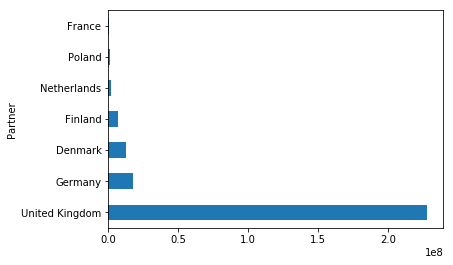

In [10]:
totalImports.head(7).plot(kind='barh');

In [11]:
exports = milk[milk[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('Ireland exports to', len(grouped), 'countries.')
print('The 5 biggest importers from Ireland are:')
grouped[VALUE].aggregate(sum).order(ascending=False).head()

Ireland exports to 82 countries.
The 5 biggest importers from Ireland are:


Partner
United Kingdom    77790928
Netherlands       34171710
Nigeria           19715359
Germany           16595152
China             15071834
Name: Trade Value (US$), dtype: int64

## Regular importers

Given that there are two commodities, the third question, 

'Which are the regular customers, i.e. which countries buy milk from Ireland every month?', is meant in the sense that a regular customer imports both commodities every month. 

This means that if the exports dataframe is grouped by country, each group has exactly ten rows (two commodities bought each of the 12 months). 

To see the countries, only the first month of one commodity has to be listed, as by definition it's the same countries every month and for the other commodity.

In [12]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 2015) & (regular[COMMODITY] == 'processed')]

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)


Just over 75% of the total Ireland exports are due to these regular customers.

In [13]:
regular[VALUE].sum() / exports[VALUE].sum() *100

0.8685447229964184

## Bi-directional trade

To address the fourth question, 

'Which countries does Ireland both import from and export to?', 

a pivot table is used to list the total export and import value for each country. 

In [14]:
countries = pivot_table(milk, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Afghanistan,59403.0,NaN
Algeria,9262229.0,NaN
Angola,1564766.0,NaN
"Areas, nes",NaN,181975.0
Australia,497400.0,NaN


Removing the rows with a missing value will result in only those countries with bi-directional trade flow with the UK.

In [15]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Austria,2507205.0,451069.0
Belgium,554056.0,476394.0
China,15071834.0,335.0
Denmark,73088.0,12294790.0
France,3466379.0,568584.0
Germany,16595152.0,17917254.0
Greece,82458.0,1608.0
Hungary,43610.0,11812.0
Italy,5582776.0,246097.0


## Conclusions

The diary trade of Ireland from January to Dec 2015 was analysed in terms of which countries Ireland mostly depends on for income (exports) and goods (imports). 

Over the period, Ireland had a trade surplus of over 10 million US dollars.

UK is the main partner, but it imported from the UK almost the triple in value than it exported to the UK. 

Ireland exported to over 80 countries during the period, but only imported from 21 countries, the main ones (top five by trade value) being geographically close.  

Ireland is heavily dependent on its regular customers, the 21 countries that buy all types of milk and cream every month. They contribute three quarters of the total export value.

Ireland has bi-directional trade (i.e. both exports and imports) with 21 countries.